In [1]:
import visa
import sys
import os
import numpy as np
import pandas as pd
import time
from matplotlib import pyplot as plt

In [2]:
rm = visa.ResourceManager()
VISA_ADDRESS=rm.list_resources()[0]
print(VISA_ADDRESS)

E4980AL = rm.open_resource(VISA_ADDRESS)
E4980AL.write(':TRIGger:SOURce %s' % ('BUS'))
E4980AL.write(':FORMat:BORDer %s' % ('SWAP'))
E4980AL.write(':FORMat:DATA %s' % ('REAL'))

USB0::0x0957::0x0909::MY54204090::0::INSTR


(19, <StatusCode.success: 0>)

In [3]:
num_pts=100
lcr_df=pd.DataFrame(np.zeros((num_pts,4)),columns=['freq','Ls','Rs','timestamp'])
lcr_df.head(3)

,freq,Ls,Rs,timestamp
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0


In [4]:
# f_pts=np.arange(20,300*1000,step=10)
f_pts=np.logspace(1.3,5.5,num_pts)
# f_pts

In [5]:

loopstart=time.time()
i=0
for freq in f_pts:

    E4980AL.write(':FREQuency %f' % (freq))
    E4980AL.write(':TRIGger:IMMediate')
    Ls,Rs,_ = E4980AL.query_binary_values(':FETCh:IMPedance:FORMatted?','d',False)
    E4980AL.write(':MEMory:CLEar %s' % ('DBUF'))
    now=time.time()-loopstart
    lcr_df.loc[i]=[freq,Ls*1E6,Rs,now]
    time.sleep(0.01)
    i+=1


# print(Ls,Rs, sep='\t')
lcr_df.tail(10)

,freq,Ls,Rs,timestamp
90,131274.936893,9.134492,2.129029,28.666157
91,144745.829889,9.108129,2.289753,28.844503
92,159599.050408,9.076224,2.484900,28.988709
93,175976.447201,9.038954,2.717903,29.140317
94,194034.424956,8.993774,2.997076,29.294678
95,213945.437965,8.940235,3.332233,29.437086
96,235899.637070,8.876460,3.732758,29.578385
97,260106.685607,8.801597,4.208445,29.761067
98,286797.761699,8.713334,4.771237,29.906274
99,316227.766017,8.667726,5.063302,30.049483


In [6]:
E4980AL.close()
rm.close()

In [7]:
# directory=r'C:\Users\dewittc\OneDrive - Boston Scientific\meter\lcr_meter\raw_data'
# os.chdir(directory)
# filename='42AWG_4_250_7_3.csv'
# lcr_df.to_csv(filename)
# lcr_df.tail(10)

In [8]:
# fig,ax=plt.subplots(nrows=1,ncols=1)
# ax.scatter(np.log10(lcr_df['freq']),lcr_df['Ls'])
# ax.set_title('Inductance vs freq')
# ax.set_ylabel('Ls (uH)')
# ax.set_xlabel('log10 freq (Hz)')

Text(0.5,0,'freq (Hz)')

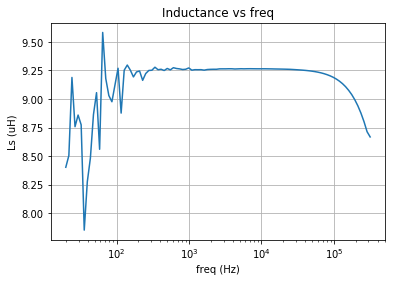

In [9]:
fig,ax=plt.subplots(nrows=1,ncols=1)
ax.semilogx(lcr_df['freq'],lcr_df['Ls'])
ax.grid()
ax.set_title('Inductance vs freq')
ax.set_ylabel('Ls (uH)')
ax.set_xlabel('freq (Hz)')

Text(0.5,0,'freq (Hz)')

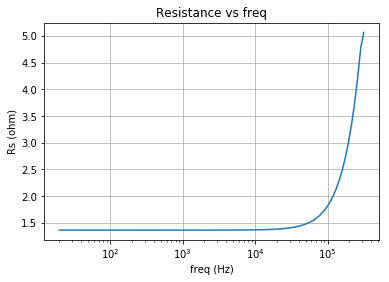

In [10]:
fig,ax=plt.subplots(nrows=1,ncols=1)
ax.semilogx(lcr_df['freq'],lcr_df['Rs'])
ax.grid()
ax.set_title('Resistance vs freq')
ax.set_ylabel('Rs (ohm)')
ax.set_xlabel('freq (Hz)')